## tl;dr / план семинара

- Поставить Python3 (если еще не)
- Настроить себе виртуальное окружение (если еще не)
 - jupyter
 - scipy, numpy
 - pandas
 - scikit-learn
 - matplotlib, seaborn
- **Сделать вид, что за 1,5 часа можно нормально записать в подкорку и механическую память API и какие-то фишки :)**

# Anaconda

- https://www.anaconda.com/download/
- Создаем виртуальное окружение
    - `~/anaconda3/bin/conda create -n made_env_py36 -y python=3.6 nomkl scipy numpy scikit-learn matplotlib jupyter`
    - `~/anaconda3/bin/conda create -n made_env_py27 -y python=2.7 nomkl scipy numpy scikit-learn matplotlib jupyter`
- Активируем виртуальное окружение
    - `~/anaconda3/bin/activate made_env_py36`
- Запускаем jupyter notebook сервер
    - `jupyter notebook`

### Q: anaconda == conda?

### A: нет
- `conda` -- пакетный менеджер
- `anaconda` -- дистрибутив, использующий `conda` в качестве пакетного менеджера

### Q: чтобы пользоваться `conda`, необходимо устанавливать зоопарк сопуствующих и не нужных библиотек в поставке `anaconda`

### A: нет
- `miniconda` -- "серверный" дистрибутив

### Q: чтобы использовать `conda`, необходимо тащить обвязку из `anaconda` /  `miniconda`

### A: нет
- `(в виртуальном окружении) pip install conda`
- `conda install ...`
- но так делать не надо, только если очень надо:)

### Нюансы, о которых не все знают
- агрессивное обновление библиотек, проблематично сделать фриз
    - нужно постараться, чтобы окружение было именно то, что нужно
- может обновить часть пакетов, часть не обновить и отрапортовать с 0 exit code
- может зафейлить обновление и зафейлить откат, превратив ваш venv в тыкву

#### для прода не очень подходит, но в связке с conda-pack можно добиться предсказуемого поведения

# Jupyter / IPython / notebook

- IPython -- интерпретатор Python с интерактивной обвязкой
     - удобен как быстрый калькулятор (`_`, `_1`) и т.д
     - magics
         - %time, %%time
         - %%bash
         - etc.
     - 
- Jupyter notebook -- сервер приложений + frontend
     - де-факто стандарт быстрого REPL прототипирования / визуализации / интерактивного презентирования (sic!)
     - **посмотрите на стандартные jupyter notebook extensions, они здорово упрощают жизнь**

# Numpy / SciPy
- BLAS, ATLAS, MKL, OpenBLAS
- Всегда удостоверяйтесь, что у вас стоит оптимизированная версия!
    - NB numpy и scipy не всегда используют одну и ту же имплементацию BLAS
- В Anaconda с недавних времен по умолчанию ставится MKL
- `nomkl` мета-пакет

### Как проверить, какая версия собрана?

In [1]:
import numpy as np
np.show_config()

blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]


In [2]:
import scipy
scipy.show_config()

openblas_lapack_info:
  NOT AVAILABLE
mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/d.gronsky/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None)]
    include_dirs = ['/Users/d.gronsky/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/d.gronsky/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None)]
    include_dirs = ['/Users/d.gronsky/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/d.gronsky/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None)]
    include_dirs = ['/Users/d.gronsky/anaconda3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/d.gronsky/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None)]
    include_dirs = ['/Users/d.gronsky/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/d.gronsky/anaconda3/lib']
    define_macros = 

# numpy.ndarray
- `numpy.ndarray` -- многомерный гомогенно типизированный массив, хрянящийся в памяти в непрерывном диапазоне адресов
    - ndim == len(shape)
    - shape
    - strides
    - dtype
        - itemsize

In [3]:
def array_info(arr):
    for attr in 'ndim shape size dtype itemsize data strides'.split():
        print('arr.{:<15} = {!r}'.format(attr, getattr(arr, attr)))

arr = np.arange(0, 12, dtype=np.float).reshape((3, 4))

print(arr) ; array_info(arr)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
arr.ndim            = 2
arr.shape           = (3, 4)
arr.size            = 12
arr.dtype           = dtype('float64')
arr.itemsize        = 8
arr.data            = <memory at 0x1115aedc8>
arr.strides         = (32, 8)


In [4]:
print(arr.T) ; array_info(arr.T)

[[ 0.  4.  8.]
 [ 1.  5.  9.]
 [ 2.  6. 10.]
 [ 3.  7. 11.]]
arr.ndim            = 2
arr.shape           = (4, 3)
arr.size            = 12
arr.dtype           = dtype('float64')
arr.itemsize        = 8
arr.data            = <memory at 0x1115aedc8>
arr.strides         = (8, 32)


### dtype -- все данные имеют тип и фиксированный "байто-размер" (itemsize)
- `int`, `'int64'`, `np.int64`, `np.uint32`, etc...
- `float`, `'np.float64'`, etc...
- `object`, `unicode`, `'<U4'`
- structured types -- можно определять C-подобные структуры

In [5]:
np.array(['a', 'b', 'cd'])  # always be aware of deduced dtype!

array(['a', 'b', 'cd'], dtype='<U2')

### Q: в пространстве имен модуля есть `dtype` c именем float. Как бы вы его определили на месте разработчика библиотеки?

### Hint: `from numpy import *` 

In [6]:
np.float is float

True

# Правило большого пальца при работе с численными вычислениями -- не пользуйтесь Python абстракциями
- используйте `numpy` версии функций -- `np.min` вместо `min`, `numpy.sort` вместо `sort`
- не изменяйте матрицы массово в циклах поэлементно, старайтесь декомпозировать свой "запрос" в некоторую последовательность векторизованных `numpy` операций
- 🚫 если вы так делаете, на 99% вы делаете не то
    - 😎 если вы уверены, что вы из 1%, то вам помогут:
        - numba.jit
        - Cython

## Создание массива
- из списка (list), кортежа, ...: `np.array`, `np.asarray`
- функции-генераторы: `arange`, `linspace`, `eye`, etc.

In [7]:
def desc(arr):
    print(arr)
    print(f'dtype={arr.dtype!r}, shape={arr.shape}\n')

In [8]:
desc(
    np.array([[1,2,3],[6,7,10]])
)

[[ 1  2  3]
 [ 6  7 10]]
dtype=dtype('int64'), shape=(2, 3)



In [9]:
desc(np.arange(0, 5))

[0 1 2 3 4]
dtype=dtype('int64'), shape=(5,)



In [10]:
desc(np.arange(0, 5, 0.5)) # не делайте так! почему?
desc(np.linspace(0, 4.5, 10))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
dtype=dtype('float64'), shape=(10,)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
dtype=dtype('float64'), shape=(10,)



In [17]:
desc(np.logspace(1, 5, 10))

[1.00000000e+01 2.78255940e+01 7.74263683e+01 2.15443469e+02
 5.99484250e+02 1.66810054e+03 4.64158883e+03 1.29154967e+04
 3.59381366e+04 1.00000000e+05]
dtype=dtype('float64'), shape=(10,)



In [18]:
np.ones((1,2,3)) # np.zeros

array([[[1., 1., 1.],
        [1., 1., 1.]]])

In [19]:
np.eye(4, dtype=np.bool)

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

## Комбинироание массивов

In [20]:
np.tile([1,2], (2, 3))

array([[1, 2, 1, 2, 1, 2],
       [1, 2, 1, 2, 1, 2]])

In [21]:
arr1 = np.linspace(0, 1, 4)
arr2 = np.linspace(10, 100, 4)
desc(
    np.vstack((arr1, arr2))
) # == np.concatenate((arr1, arr2), 0)

[[  0.           0.33333333   0.66666667   1.        ]
 [ 10.          40.          70.         100.        ]]
dtype=dtype('float64'), shape=(2, 4)



In [22]:
arr1 = np.linspace(0, 1, 4)
arr2 = np.linspace(10, 100, 4)
desc(
    np.hstack((arr1, arr2))
) # == np.concatenate((arr1, arr2), 1)

[  0.           0.33333333   0.66666667   1.          10.
  40.          70.         100.        ]
dtype=dtype('float64'), shape=(8,)



# Изменение размерности

In [23]:
arr = np.arange(12) ; desc(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
dtype=dtype('int64'), shape=(12,)



In [24]:
arr.reshape((4, 3))
# == arr.reshape((4, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [25]:
desc(arr[np.newaxis, :])
desc(arr[:, np.newaxis])

[[ 0  1  2  3  4  5  6  7  8  9 10 11]]
dtype=dtype('int64'), shape=(1, 12)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
dtype=dtype('int64'), shape=(12, 1)



In [26]:
arr.shape = (2,6) # arr = arr.reshape(2,6)
desc(arr)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
dtype=dtype('int64'), shape=(2, 6)



In [27]:
arr.T

array([[ 0,  6],
       [ 1,  7],
       [ 2,  8],
       [ 3,  9],
       [ 4, 10],
       [ 5, 11]])

In [28]:
desc(np.array([1,2,3,4]))
#desc(np.array([1,2,3,4]).T)

[1 2 3 4]
dtype=dtype('int64'), shape=(4,)



#  Доступ к элементам

In [29]:
arr = np.arange(6).reshape((2,3)) ; arr

array([[0, 1, 2],
       [3, 4, 5]])

In [30]:
print(arr[0,1])
print(arr[[0,1,0], [0,0,0]])  #  на каждое измерение массив индексов

1
[0 3 0]


In [31]:
print(arr > 3) # булева маска, имеющая такой же shape, как и наш массив
arr[arr > 3]

[[False False False]
 [False  True  True]]


array([4, 5])

In [32]:
print(arr[0, :])
print(arr[:, 0]) # не столбец! вектор!

[0 1 2]
[0 3]


In [33]:
arr[0, 1:2]  # start_inclusive : stop_exclusive : step

array([1])

In [34]:
np.arange(10)[::-1] # отрицательный step

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [35]:
# пример импользования массива индексов
arr = np.array([1,-1,3,5,-10])
print(np.argsort(arr))
print(arr[np.argsort(arr)])

[4 1 0 2 3]
[-10  -1   1   3   5]


# views и память

In [36]:
arr = np.array([[1,2,3],[4,5,6]])
print(arr)
print(arr.ravel())
arr.ravel()[-1] = 100500
print(arr)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]
[[     1      2      3]
 [     4      5 100500]]


In [37]:
arr[0, :][2] = 200
 

### `numpy` старается экономить память
- не делается копия -- создается т.к. называемый `view` на оригинальные данные
    - `[:]`, `[np.newaxis, ...]`
    - `ravel()`, `reshape()`, изменение `shape`
- до тех пор, пока вы **не трогаете** memory order (C, Fortran)

In [38]:
arr = np.arange(10) ; array_info(arr)
arr1 = arr[::-1]
print('\n')
array_info(arr1)


arr.ndim            = 1
arr.shape           = (10,)
arr.size            = 10
arr.dtype           = dtype('int64')
arr.itemsize        = 8
arr.data            = <memory at 0x111683948>
arr.strides         = (8,)


arr.ndim            = 1
arr.shape           = (10,)
arr.size            = 10
arr.dtype           = dtype('int64')
arr.itemsize        = 8
arr.data            = <memory at 0x111683948>
arr.strides         = (-8,)


In [39]:
arr.view(dtype=np.int8)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0,
       0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 8, 0,
       0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [54]:
arr = np.array([256**2 + 1])
desc(arr)
desc(arr.view(dtype=np.uint8))

[65537]
dtype=dtype('int64'), shape=(1,)

[1 0 1 0 0 0 0 0]
dtype=dtype('uint8'), shape=(8,)



# Операции

In [55]:
# element-wise
arr = np.arange(6)
print(arr + 1)
print(np.exp(arr))
print(np.log(arr + 1))

[1 2 3 4 5 6]
[  1.           2.71828183   7.3890561   20.08553692  54.59815003
 148.4131591 ]
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947]


In [56]:
# агрегаты
arr = np.arange(6).reshape((2, -1))
print(arr.mean(axis=0)) # sum, median, var, etc.
print(arr.mean(axis=1))

[1.5 2.5 3.5]
[1. 4.]


# Broadcasting

In [57]:
a = np.array([[1,2,3],[4,5,6]]) ; print(a.shape)
b = np.array([[1],[2]]) ; print(b.shape)

(2, 3)
(2, 1)


In [58]:
a + b # почему работает?

array([[2, 3, 4],
       [6, 7, 8]])

- добавляются фиктивные лидирующие 1 в shape пока не сравняются ndim
- поэлементно применяется операция, если размерности на каждой позиции равны или одна из них равна 1

# Pandas

# Практикум изображения

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
import numpy as np

In [61]:
from ipywidgets import interact

In [62]:
from PIL import Image

def load_image(fn) :
    img = Image.open(fn)
    img.load()
    data = np.asarray(img, dtype="int32")
    return data

(183, 275, 3)


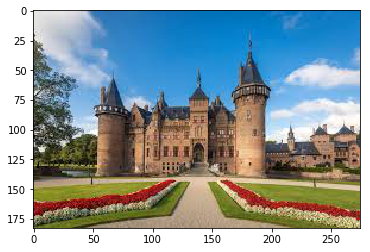

In [63]:
img = load_image('./img.jpg')
print(img.shape)
plt.imshow(img)

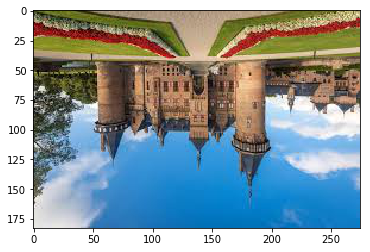

In [68]:
# зеркально отразите изображение относительно горихонтали
plt.imshow(img[::-1, ...])

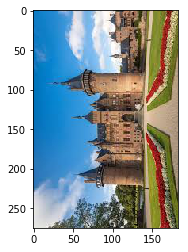

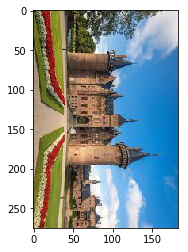

In [69]:
# поверните ихображение на 90 градусов влево и вправо (numpy swapaxis)
plt.imshow(
    np.swapaxes(img, 0, 1)[::-1]
)
plt.show()
plt.imshow(
    np.swapaxes(img, 0, 1)[:,::-1]
)

/Users/d.gronsky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


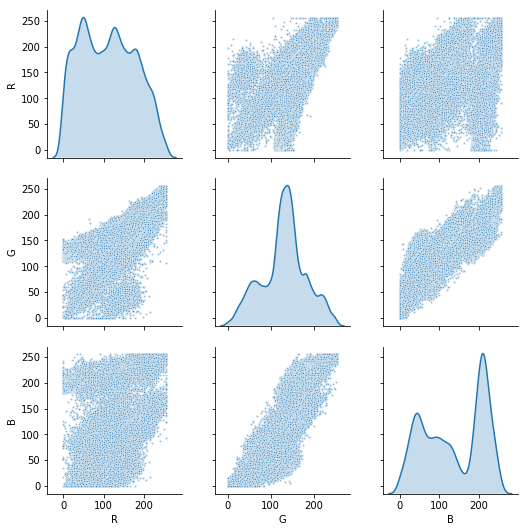

In [72]:
# Получите совместные поканальные гистограммы интенсивностей
import pandas as pd
import seaborn as sns
df = pd.DataFrame(data=img.reshape(-1, 3), columns=list('RGB')) ; df.head()
sns.pairplot(df, plot_kws={'s':5, 'alpha':.5}, diag_kind='kde')

In [73]:
# Инвертируйте синий канал

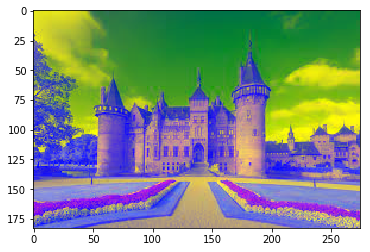

In [74]:
def invert_blue_channel():
    inv = img.copy()
    inv[..., 2] = 255 - inv[..., 2]
    return inv
plt.imshow(invert_blue_channel())

In [75]:
# Сделайте изображение черно белым
gs = img.mean(2).astype('int32')

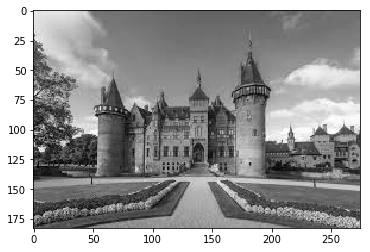

In [76]:
plt.imshow(gs, cmap='gray')

In [77]:
# примените гамма-коррекцию
@interact
def gamma(g=(.5, 5.5, 1)):
    plt.imshow((gs / 256) ** g,  cmap='gray')

interactive(children=(FloatSlider(value=2.5, description='g', max=5.5, min=0.5, step=1.0), Output()), _dom_cla…

In [78]:
@interact
def gamma_correction(gamma=(0.1, 5.1, 1)):
    plt.imshow((img / 256) ** gamma)

interactive(children=(FloatSlider(value=2.1, description='gamma', max=5.1, min=0.1, step=1.0), Output()), _dom…

In [81]:
# Бинаризуйте изображениие по порогу
@interact
def black_white(thres=(0,255, 10)):
    binarized = gs.copy()
    mask = binarized > thres
    binarized[mask] = 255
    binarized[~mask] = 0
    plt.imshow(binarized, cmap='gray')
    # как сделать оптимальнее?

interactive(children=(IntSlider(value=120, description='thres', max=255, step=10), Output()), _dom_classes=('w…

In [82]:
# Бинаризуйте изображениие по порогу
@interact
def better_black_white(thres=(0,255, 10)):
    plt.imshow(gs > thres, cmap='gray')

interactive(children=(IntSlider(value=120, description='thres', max=255, step=10), Output()), _dom_classes=('w…

In [83]:
# "ужмите" изображение с помощью kmeans

In [84]:
from sklearn.cluster import KMeans
img.reshape

<function ndarray.reshape>

In [85]:
@interact
def clusterize(n_clusters=(1,15,1)):
    from sklearn.cluster import KMeans
    cls = KMeans(n_clusters=n_clusters).fit(img.reshape(-1, 3))
    plt.imshow(cls.cluster_centers_[cls.labels_].reshape(img.shape).astype('int32'))

interactive(children=(IntSlider(value=8, description='n_clusters', max=15, min=1), Output()), _dom_classes=('w…

# Оценки параметров

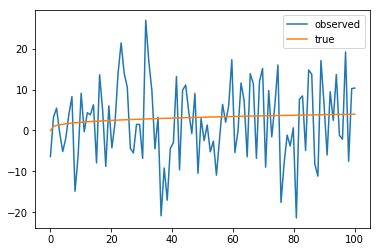

In [86]:
true_a = .3
sigma = 10

def my_mega_func(X, a):
    return X**a

X = np.linspace(0, 100, 100)
true_y = my_mega_func(X, true_a)
noise = np.random.randn(*X.shape)
observed = true_y + sigma * noise

plt.plot(X, observed, label='observed' )
plt.plot(X, true_y, label='true')
plt.legend()

In [108]:
import scipy
import scipy.optimize

In [109]:
scipy.optimize.curve_fit(my_mega_func, X, observed)

(array([0.2146007]), array([[0.01167792]]))

In [110]:
# как зависит от sigma?

In [111]:
def get_estimate(idx, observed):
    bs_X = X[idx]
    bs_y = observed[idx]
    est, _ = scipy.optimize.curve_fit(my_mega_func, bs_X , bs_y)
    return est

def sample_bs_estimates(bs_samples, observed):
    estimates = []
    for bs_sample_iteration in range(bs_samples):
        idx = np.random.randint(0, X.shape[0], size=X.shape[0])
        estimates.append(get_estimate(idx, observed))
    estimates = np.asarray(estimates)
    return estimates

In [150]:
def do_experiment(sigma):
    return sample_bs_estimates(10_000, true_y + sigma * noise)
    

/Users/d.gronsky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


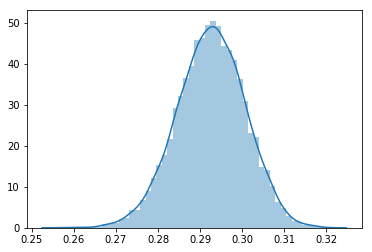

In [151]:
sns.distplot(do_experiment(sigma=1))

In [152]:
from tqdm.autonotebook import tqdm

In [153]:
np.percentile([0,1,2,3,4], [25, 75])

array([1., 3.])

In [163]:
sigmas = np.linspace(0, 5, 20)
percentiles = []

for sigma in tqdm(sigmas):
    percentiles.append(np.percentile(
        do_experiment(sigma=sigma),
        [2.5, 25, 75, 97.5]
    ))

/Users/d.gronsky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


In [164]:
percentiles = np.asarray(percentiles)

In [165]:
percentiles.shape

(20, 4)

Text(0.5, 1.0, '95% confidence interval')

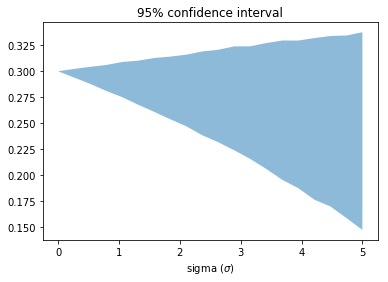

In [172]:
plt.fill_between(sigmas, percentiles[:, 0], percentiles[:, -1], alpha=.5)
plt.xlabel('sigma ($\sigma$)')
plt.title('95% confidence interval')